In [1]:
import pandas as pd

df = pd.read_csv('311_2023.csv')
pd.set_option('display.max_columns', None)
print(df.head())

C:\Users\Anupam\AppData\Local\Temp\ipykernel_20588\634481796.py:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('311_2023.csv')


   case_enquiry_id              open_dt        sla_target_dt  \
0     101005136992  2023-10-23 05:12:11  2023-10-24 05:12:12   
1     101005137004  2023-10-23 05:15:10  2023-10-24 05:15:12   
2     101005137030  2023-10-23 05:23:10  2023-10-24 05:23:10   
3     101005136942  2023-10-23 04:50:00  2023-10-30 04:50:40   
4     101005136955  2023-10-23 04:58:00  2023-11-22 03:58:18   

             closed_dt  on_time case_status  \
0  2023-11-02 04:48:23  OVERDUE      Closed   
1  2023-10-23 06:01:07   ONTIME      Closed   
2  2023-10-23 06:08:47   ONTIME      Closed   
3  2023-10-23 05:53:37   ONTIME      Closed   
4  2023-10-23 11:14:09   ONTIME      Closed   

                                      closure_reason  \
0  Case Closed. Closed date : 2023-11-02 08:48:23...   
1  Case Closed. Closed date : Mon Oct 23 10:01:07...   
2  Case Closed. Closed date : Mon Oct 23 10:08:47...   
3  Case Closed. Closed date : Mon Oct 23 09:53:37...   
4  Case Closed. Closed date : Mon Oct 23 15:14:09...

In [2]:
print(df.shape)

(266438, 30)


In [3]:
print(df.columns)

Index(['case_enquiry_id', 'open_dt', 'sla_target_dt', 'closed_dt', 'on_time',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submitted_photo', 'closed_photo',
       'location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'geom_4326', 'source'],
      dtype='object')


In [6]:
#pd.options.display.max_rows = None
print(list(df['subject'].unique()))
print(df['subject'].nunique())

['Transportation - Traffic Division', 'Public Works Department', 'Parks & Recreation Department', 'Inspectional Services', "Mayor's 24 Hour Hotline", 'Animal Control', 'Neighborhood Services', 'Property Management', 'Boston Water & Sewer Commission', 'Boston Police Department']
10


C:\Users\Anupam\AppData\Local\Temp\ipykernel_16572\676862074.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animal_rescue_df["open_dt"] = pd.to_datetime(animal_rescue_df["open_dt"])
C:\Users\Anupam\AppData\Local\Temp\ipykernel_16572\676862074.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animal_rescue_df["closed_dt"] = pd.to_datetime(animal_rescue_df["closed_dt"], errors="coerce")
C:\Users\Anupam\AppData\Local\Temp\ipykernel_16572\676862074.py:11: SettingWithCopyWarning: 
A value is trying to be 

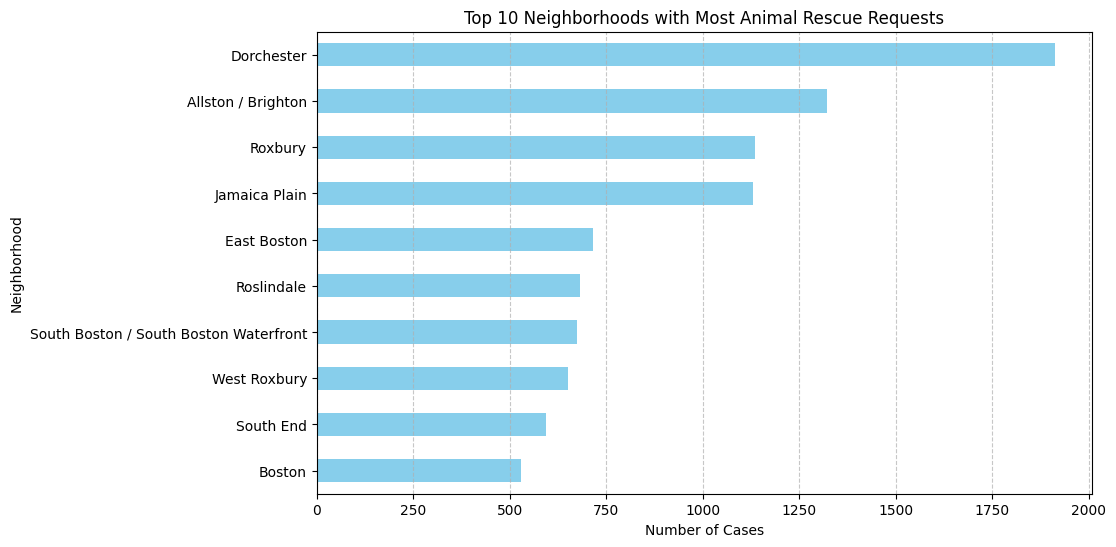

Total Cases: 12582
Open Cases: 768
Closed Cases: 11814
Average Response Time: 0.73 days


In [4]:
import matplotlib.pyplot as plt

keywords = ['Animal', 'Rodent',]
pattern = "|".join(keywords)

animal_rescue_df = df[df['case_title'].str.contains("Animal", case=False, na=False)]

animal_rescue_df["open_dt"] = pd.to_datetime(animal_rescue_df["open_dt"])
animal_rescue_df["closed_dt"] = pd.to_datetime(animal_rescue_df["closed_dt"], errors="coerce")

animal_rescue_df["response_time"] = (animal_rescue_df["closed_dt"] - animal_rescue_df["open_dt"]).dt.days

total_cases = len(animal_rescue_df)
open_cases = (animal_rescue_df["case_status"] == "Open").sum()
closed_cases = (animal_rescue_df["case_status"] == "Closed").sum()
avg_response_time = animal_rescue_df["response_time"].mean()

cases_by_neighborhood = animal_rescue_df["neighborhood"].value_counts().head(10)

plt.figure(figsize=(10, 6))
cases_by_neighborhood.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel("Number of Cases")
plt.ylabel("Neighborhood")
plt.title("Top 10 Neighborhoods with Most Animal Rescue Requests")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print(f"Total Cases: {total_cases}")
print(f"Open Cases: {open_cases}")
print(f"Closed Cases: {closed_cases}")
print(f"Average Response Time: {avg_response_time:.2f} days")